In [ ]:
import cv2
import numpy as np

show_images = 1

def fastThin(img_ori):
  obj = 0
  bg = 255
  img = img_ori.copy()
  if(show_images):
    plt.imshow('pre morphology',img)
  img = morphology(img)
  cleanCorners(img)
  if(show_images):
    plt.imshow('morphology',img)
  eraseTwoByTwos(img)
  if(show_images):
    plt.imshow('morphology + eraseTwoByTwos',img)
  eraseLadders(img)
  if(show_images):
    plt.imshow('morphology + eraseTwoByTwos + eraseLadders',img)
  return img

def morphology(img):
  # inverts the image to execute easier operations (sum and subtraction)
  a, img = cv2.threshold(img,100,255,cv2.THRESH_BINARY_INV) 
  # generates 3 by 3 cross kernel
  kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)) 
  # iteration counter
  iteration = 0
  #print "Starting fast thin..."
  while 1:
    iteration += 1
    #print "Running iteration",iteration,"of morphology" # "Running iteration x"
    #erosion
    last_img = img.copy()
    ero = cv2.erode(img,kernel,iterations = 1)
    #dilation
    dil = cv2.dilate(ero,kernel,iterations = 1)
    # result = original - dilated + eroded
    img -= dil
    img += ero
    # ends loop if result is the same from last iteration
    if cv2.compare(img, last_img, cv2.CMP_EQ).all():
      break
  a, img = cv2.threshold(img,100,255,cv2.THRESH_BINARY_INV) # inverts back the image
  return img

# came up with this one by myself, if anyone finds a better way of detecting/reducing interest areas please tell me
def eraseTwoByTwos(img):
  altura = img.shape[0]
  largura = img.shape[1]
  obj = 0
  bg = 255
  for y in xrange(1,altura-2):
    for x in xrange(1,largura-2):
      #centrais
      c1 = img[y,x]
      c2 = img[y,x+1]
      c3 = img[y+1,x]
      c4 = img[y+1,x+1]
      if(c1 == obj and c2 == obj and c3 == obj and c4 == obj):
        if img[y-1,x-1]!=obj:
          img[y,x] = bg
          pass
        elif img[y-1,x+2]!=obj:
          img[y,x+1]=bg
          pass
        elif img[y+2,x-1]!=obj:
          img[y+1,x]=bg
          pass
        elif img[y+2,x+2]!=obj:
          img[y+1,x+1]=bg
          pass
        #vizinhos
        v1  = img[y-1,x-1]
        v2  = img[y-1,x]
        v3  = img[y-1,x+1]
        v4  = img[y-1,x+2]
        v5  = img[y,x+2]
        v6  = img[y+1,x+2]
        v7  = img[y+2,x+2]
        v8  = img[y+2,x+1]
        v9  = img[y+2,x]
        v10 = img[y+2,x-1]
        v11 = img[y+1,x-1]
        v12 = img[y,x-1]
        vizinhos = [v12,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11]

# sets the borders of the image as bg
def cleanCorners(img):
  altura = img.shape[0]
  largura = img.shape[1]
  bg = 255
  img[0:altura,0] = bg
  img[0,0:largura] = bg
  img[0:altura,largura-1] = bg
  img[altura-1,0:largura] = bg

# used in Zhang Suen algorithms to eliminate undesired corners
def eraseLadders(img):
  altura = img.shape[0]
  largura = img.shape[1]
  obj = 0
  bg = 255
  m1 = [[255,0,7  ],
        [0,  0,7  ],
        [7,  7,255]]
  m2 = [[7,  0,255],
        [7,  0,0  ],
        [255,7,7  ]]
  m3 = [[7,  7,255],
        [0,  0,7  ],
        [255,0,7  ]]
  m4 = [[255,7,7  ],
        [7,  0,0  ],
        [7,  0,255]]
  mask = [m1,m2,m3,m4]
  for y in xrange(1,altura-1):
    for x in xrange(1,largura-1):
      p5 = img[y,x]
      if p5 == obj:
        p1 = img[y-1,x-1]
        p2 = img[y-1,x]
        p3 = img[y-1,x+1]
        p4 = img[y,x-1]
        p6 = img[y,x+1]
        p7 = img[y+1,x-1]
        p8 = img[y+1,x]
        p9 = img[y+1,x+1]
        p = [[p1,p2,p3],
             [p4,p5,p6],
             [p7,p8,p9]]
        for m in mask:
          pairing = 1
          for i in xrange(0,3):
            for j in xrange(0,3):
              if m[i][j] != 7:
                if m[i][j] != p[i][j]:
                  pairing = 0
          if pairing:
            img[y,x] = bg
            break

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:2142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if v not in values:


ValueError: ignored

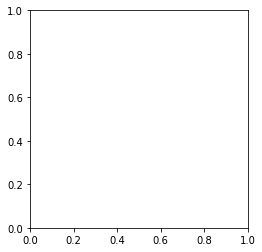

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#import ftlib as ft

img = cv2.imread('7.jpg',0) #binary image
thinned_image = fastThin(img)
plt.imshow('original image',img)
plt.imshow('thinned image',thinned_image)
#cv2.waitKey(0) # press any key to close
#cv2.destroyAllWindows()

In [ ]:
from PIL import Image, ImageFilter
from math import sqrt
#import utils

sobelOperator = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

def merge_images(a, b, f):
    result = a.copy()
    result_load = result.load()
    a_load = a.load()
    b_load = b.load()

    (x, y) = a.size
    for i in range(0, x):
        for j in range(0, y):
            result_load[i, j] = f(a_load[i, j], b_load[i, j])

    return result

def partial_sobels(im):
    ySobel = im.filter(ImageFilter.Kernel((3, 3), flatten(sobelOperator), 1))
    xSobel = im.filter(ImageFilter.Kernel((3, 3), flatten(transpose(sobelOperator)), 1))
    return (xSobel, ySobel)

def full_sobels(im):
    (xSobel, ySobel) = partial_sobels(im)
    sobel = merge_images(xSobel, ySobel, lambda x, y: sqrt(x**2 + y**2))
    return (xSobel, ySobel, sobel)

In [ ]:
from PIL import Image, ImageDraw
import math
#import sobel
import copy

def apply_kernel_at(get_value, kernel, i, j):
    kernel_size = len(kernel)
    result = 0
    for k in range(0, kernel_size):
        for l in range(0, kernel_size):
            pixel = get_value(i + k - kernel_size / 2, j + l - kernel_size / 2)
            result += pixel * kernel[k][l]
    return result

def apply_to_each_pixel(pixels, f):
    for i in range(0, len(pixels)):
        for j in range(0, len(pixels[i])):
            pixels[i][j] = f(pixels[i][j])

def calculate_angles(im, W, f, g):
    (x, y) = im.size
    im_load = im.load()
    get_pixel = lambda x, y: im_load[x, y]

    ySobel = sobelOperator
    xSobel = transpose(sobelOperator)

    result = [[] for i in range(1, x, W)]

    for i in range(1, x, W):
        for j in range(1, y, W):
            nominator = 0
            denominator = 0
            for k in range(i, min(i + W , x - 1)):
                for l in range(j, min(j + W, y - 1)):
                    Gx = apply_kernel_at(get_pixel, xSobel, k, l)
                    Gy = apply_kernel_at(get_pixel, ySobel, k, l)
                    nominator += f(Gx, Gy)
                    denominator += g(Gx, Gy)
            angle = (math.pi + math.atan2(nominator, denominator)) / 2
            result[(i - 1) / W].append(angle)

    return result

def flatten(ls):
    return reduce(lambda x, y: x + y, ls, [])

def transpose(ls):
    return map(list, zip(*ls))

def gauss(x, y):
    ssigma = 1.0
    return (1 / (2 * math.pi * ssigma)) * math.exp(-(x * x + y * y) / (2 * ssigma))

def kernel_from_function(size, f):
    kernel = [[] for i in range(0, size)]
    for i in range(0, size):
        for j in range(0, size):
            kernel[i].append(f(i - size / 2, j - size / 2))
    return kernel

def gauss_kernel(size):
    return kernel_from_function(size, gauss)

def apply_kernel(pixels, kernel):
    apply_kernel_with_f(pixels, kernel, lambda old, new: new)

def apply_kernel_with_f(pixels, kernel, f):
    size = len(kernel)
    for i in range(size / 2, len(pixels) - size / 2):
        for j in range(size / 2, len(pixels[i]) - size / 2):
            pixels[i][j] = f(pixels[i][j], apply_kernel_at(lambda x, y: pixels[x][y], kernel, i, j))

def smooth_angles(angles):
    cos_angles = copy.deepcopy(angles)
    sin_angles = copy.deepcopy(angles)
    apply_to_each_pixel(cos_angles, lambda x: math.cos(2 * x))
    apply_to_each_pixel(sin_angles, lambda x: math.sin(2 * x))

    kernel = gauss_kernel(5)
    apply_kernel(cos_angles, kernel)
    apply_kernel(sin_angles, kernel)

    for i in range(0, len(cos_angles)):
        for j in range(0, len(cos_angles[i])):
            cos_angles[i][j] = (math.atan2(sin_angles[i][j], cos_angles[i][j])) / 2

    return cos_angles

def load_image(im):
    (x, y) = im.size
    im_load = im.load()

    result = []
    for i in range(0, x):
        result.append([])
        for j in range(0, y):
            result[i].append(im_load[i, j])

    return result

def load_pixels(im, pixels):
    (x, y) = im.size
    im_load = im.load()

    for i in range(0, x):
        for j in range(0, y):
            im_load[i, j] = pixels[i][j]

def get_line_ends(i, j, W, tang):
    if -1 <= tang and tang <= 1:
        begin = (i, (-W/2) * tang + j + W/2)
        end = (i + W, (W/2) * tang + j + W/2)
    else:
        begin = (i + W/2 + W/(2 * tang), j + W/2)
        end = (i + W/2 - W/(2 * tang), j - W/2)
    return (begin, end)

def draw_lines(im, angles, W):
    (x, y) = im.size
    result = im.convert("RGB")

    draw = ImageDraw.Draw(result)

    for i in range(1, x, W):
        for j in range(1, y, W):
            tang = math.tan(angles[(i - 1) / W][(j - 1) / W])

            (begin, end) = get_line_ends(i, j, W, tang)
            draw.line([begin, end], fill=150)

    del draw

    return result

In [ ]:
from PIL import Image, ImageDraw
#import utils
import argparse
import math
import os
#from utils import flatten, transpose

usage = False

def apply_structure(pixels, structure, result):
    global usage
    usage = False

    def choose(old, new):
        global usage
        if new == result:
            usage = True
            return 0.0
        return old

    apply_kernel_with_f(pixels, structure, choose)

    return usage

def apply_all_structures(pixels, structures):
    usage = False
    for structure in structures:
        usage |= apply_structure(pixels, structure, flatten(structure).count(1))

    return usage

def make_thin(im):
    loaded = load_image(im)
    apply_to_each_pixel(loaded, lambda x: 0.0 if x > 10 else 1.0)
    print("loading phase done")

    t1 = [[1, 1, 1], [0, 1, 0], [0.1, 0.1, 0.1]]
    t2 = transpose(t1)
    t3 = reverse(t1)
    t4 = transpose(t3)
    t5 = [[0, 1, 0], [0.1, 1, 1], [0.1, 0.1, 0]]
    t7 = transpose(t5)
    t6 = reverse(t7)
    t8 = reverse(t5)

    thinners = [t1, t2, t3, t4, t5, t6, t7]

    usage = True
    while(usage):
        usage = apply_all_structures(loaded, thinners)
        print("single thining phase done")

    print("thining done")

    apply_to_each_pixel(loaded, lambda x: 255.0 * (1 - x))
    load_pixels(im, loaded)
    im.show()

def reverse(ls):
    cpy = list(ls[:])
    cpy.reverse()
    return cpy

if __name__ == "__main__":
    #parser = argparse.ArgumentParser(description="Image thining")
    #parser.add_argument("p1_0_f.jpg", nargs=1, help = "Path to image")
    #parser.add_argument("--save", action='store_true', help = "Save result image as src_image_thinned.gif")
    #args = parser.parse_args()

    #im = Image.open(args.image[0])
    im = Image.open("7.jpg")
    im = im.convert("L")  # covert to grayscale
    im.show()

    make_thin(im)

    #if args.save:
    #    base_image_name = os.path.splitext(os.path.basename(args.image[0]))[0]
    im.save("_thinned.jpg")

loading phase done


TypeError: ignored

In [ ]:
import numpy as np
import cv2
from scipy import signal
from scipy import ndimage
import math
import scipy

class FingerprintImageEnhancer(object):
    def __init__(self):
        self.ridge_segment_blksze = 16
        self.ridge_segment_thresh = 0.1
        self.gradient_sigma = 1
        self.block_sigma = 7
        self.orient_smooth_sigma = 7
        self.ridge_freq_blksze = 38
        self.ridge_freq_windsze = 5
        self.min_wave_length = 5
        self.max_wave_length = 15
        self.kx = 0.65
        self.ky = 0.65
        self.angleInc = 3
        self.ridge_filter_thresh = -3


        self._mask = []
        self._normim = []
        self._orientim = []
        self._mean_freq = []
        self._median_freq = []
        self._freq = []
        self._freqim = []
        self._binim = []

    def __normalise(self, img, mean, std):
        normed = (img - np.mean(img)) / (np.std(img))
        return (normed)

    def __ridge_segment(self, img):
        # RIDGESEGMENT - Normalises fingerprint image and segments ridge region
        #
        # Function identifies ridge regions of a fingerprint image and returns a
        # mask identifying this region.  It also normalises the intesity values of
        # the image so that the ridge regions have zero mean, unit standard
        # deviation.
        #
        # This function breaks the image up into blocks of size blksze x blksze and
        # evaluates the standard deviation in each region.  If the standard
        # deviation is above the threshold it is deemed part of the fingerprint.
        # Note that the image is normalised to have zero mean, unit standard
        # deviation prior to performing this process so that the threshold you
        # specify is relative to a unit standard deviation.
        #
        # Usage:   [normim, mask, maskind] = ridgesegment(im, blksze, thresh)
        #
        # Arguments:   im     - Fingerprint image to be segmented.
        #              blksze - Block size over which the the standard
        #                       deviation is determined (try a value of 16).
        #              thresh - Threshold of standard deviation to decide if a
        #                       block is a ridge region (Try a value 0.1 - 0.2)
        #
        # Ouput:     normim - Image where the ridge regions are renormalised to
        #                       have zero mean, unit standard deviation.
        #              mask   - Mask indicating ridge-like regions of the image,
        #                       0 for non ridge regions, 1 for ridge regions.
        #              maskind - Vector of indices of locations within the mask.
        #
        # Suggested values for a 500dpi fingerprint image:
        #
        #   [normim, mask, maskind] = ridgesegment(im, 16, 0.1)
        #
        # See also: RIDGEORIENT, RIDGEFREQ, RIDGEFILTER

        ### REFERENCES

        # Peter Kovesi
        # School of Computer Science & Software Engineering
        # The University of Western Australia
        # pk at csse uwa edu au
        # http://www.csse.uwa.edu.au/~pk
        rows, cols = img.shape
        im = self.__normalise(img, 0, 1)  # normalise to get zero mean and unit standard deviation

        new_rows = np.int(self.ridge_segment_blksze * np.ceil((np.float(rows)) / (np.float(self.ridge_segment_blksze))))
        new_cols = np.int(self.ridge_segment_blksze * np.ceil((np.float(cols)) / (np.float(self.ridge_segment_blksze))))

        padded_img = np.zeros((new_rows, new_cols))
        stddevim = np.zeros((new_rows, new_cols))
        padded_img[0:rows][:, 0:cols] = im
        for i in range(0, new_rows, self.ridge_segment_blksze):
            for j in range(0, new_cols, self.ridge_segment_blksze):
                block = padded_img[i:i + self.ridge_segment_blksze][:, j:j + self.ridge_segment_blksze]

                stddevim[i:i + self.ridge_segment_blksze][:, j:j + self.ridge_segment_blksze] = np.std(block) * np.ones(block.shape)

        stddevim = stddevim[0:rows][:, 0:cols]
        self._mask = stddevim > self.ridge_segment_thresh
        mean_val = np.mean(im[self._mask])
        std_val = np.std(im[self._mask])
        self._normim = (im - mean_val) / (std_val)

    def __ridge_orient(self):
        # RIDGEORIENT - Estimates the local orientation of ridges in a fingerprint
        #
        # Usage:  [orientim, reliability, coherence] = ridgeorientation(im, gradientsigma,...
        #                                             blocksigma, ...
        #                                             orientsmoothsigma)
        #
        # Arguments:  im                - A normalised input image.
        #             gradientsigma     - Sigma of the derivative of Gaussian
        #                                 used to compute image gradients.
        #             blocksigma        - Sigma of the Gaussian weighting used to
        #                                 sum the gradient moments.
        #             orientsmoothsigma - Sigma of the Gaussian used to smooth
        #                                 the final orientation vector field.
        #                                 Optional: if ommitted it defaults to 0
        #
        # Output:    orientim          - The orientation image in radians.
        #                                 Orientation values are +ve clockwise
        #                                 and give the direction *along* the
        #                                 ridges.
        #             reliability       - Measure of the reliability of the
        #                                 orientation measure.  This is a value
        #                                 between 0 and 1. I think a value above
        #                                 about 0.5 can be considered 'reliable'.
        #                                 reliability = 1 - Imin./(Imax+.001);
        #             coherence         - A measure of the degree to which the local
        #                                 area is oriented.
        #                                 coherence = ((Imax-Imin)./(Imax+Imin)).^2;
        #
        # With a fingerprint image at a 'standard' resolution of 500dpi suggested
        # parameter values might be:
        #
        #    [orientim, reliability] = ridgeorient(im, 1, 3, 3);
        #
        # See also: RIDGESEGMENT, RIDGEFREQ, RIDGEFILTER

        ### REFERENCES

        # May 2003      Original version by Raymond Thai,
        # January 2005  Reworked by Peter Kovesi
        # October 2011  Added coherence computation and orientsmoothsigma made optional
        #
        # School of Computer Science & Software Engineering
        # The University of Western Australia
        # pk at csse uwa edu au
        # http://www.csse.uwa.edu.au/~pk

        rows,cols = self._normim.shape
        #Calculate image gradients.
        sze = np.fix(6*self.gradient_sigma)
        if np.remainder(sze,2) == 0:
            sze = sze+1

        gauss = cv2.getGaussianKernel(np.int(sze),self.gradient_sigma)
        f = gauss * gauss.T

        fy,fx = np.gradient(f)                               #Gradient of Gaussian

        Gx = signal.convolve2d(self._normim, fx, mode='same')
        Gy = signal.convolve2d(self._normim, fy, mode='same')

        Gxx = np.power(Gx,2)
        Gyy = np.power(Gy,2)
        Gxy = Gx*Gy

        #Now smooth the covariance data to perform a weighted summation of the data.
        sze = np.fix(6*self.block_sigma)

        gauss = cv2.getGaussianKernel(np.int(sze), self.block_sigma)
        f = gauss * gauss.T

        Gxx = ndimage.convolve(Gxx,f)
        Gyy = ndimage.convolve(Gyy,f)
        Gxy = 2*ndimage.convolve(Gxy,f)

        # Analytic solution of principal direction
        denom = np.sqrt(np.power(Gxy,2) + np.power((Gxx - Gyy),2)) + np.finfo(float).eps

        sin2theta = Gxy/denom                   # Sine and cosine of doubled angles
        cos2theta = (Gxx-Gyy)/denom


        if self.orient_smooth_sigma:
            sze = np.fix(6*self.orient_smooth_sigma)
            if np.remainder(sze,2) == 0:
                sze = sze+1
            gauss = cv2.getGaussianKernel(np.int(sze), self.orient_smooth_sigma)
            f = gauss * gauss.T
            cos2theta = ndimage.convolve(cos2theta,f)                   # Smoothed sine and cosine of
            sin2theta = ndimage.convolve(sin2theta,f)                   # doubled angles

        self._orientim = np.pi/2 + np.arctan2(sin2theta,cos2theta)/2

    def __ridge_freq(self):
        # RIDGEFREQ - Calculates a ridge frequency image
        #
        # Function to estimate the fingerprint ridge frequency across a
        # fingerprint image. This is done by considering blocks of the image and
        # determining a ridgecount within each block by a call to FREQEST.
        #
        # Usage:
        #  [freqim, medianfreq] =  ridgefreq(im, mask, orientim, blksze, windsze, ...
        #                                    minWaveLength, maxWaveLength)
        #
        # Arguments:
        #         im       - Image to be processed.
        #         mask     - Mask defining ridge regions (obtained from RIDGESEGMENT)
        #         orientim - Ridge orientation image (obtained from RIDGORIENT)
        #         blksze   - Size of image block to use (say 32)
        #         windsze  - Window length used to identify peaks. This should be
        #                    an odd integer, say 3 or 5.
        #         minWaveLength,  maxWaveLength - Minimum and maximum ridge
        #                     wavelengths, in pixels, considered acceptable.
        #
        # Output:
        #         freqim     - An image  the same size as im with  values set to
        #                      the estimated ridge spatial frequency within each
        #                      image block.  If a  ridge frequency cannot be
        #                      found within a block, or cannot be found within the
        #                      limits set by min and max Wavlength freqim is set
        #                      to zeros within that block.
        #         medianfreq - Median frequency value evaluated over all the
        #                      valid regions of the image.
        #
        # Suggested parameters for a 500dpi fingerprint image
        #   [freqim, medianfreq] = ridgefreq(im,orientim, 32, 5, 5, 15);
        #

        # See also: RIDGEORIENT, FREQEST, RIDGESEGMENT

        # Reference:
        # Hong, L., Wan, Y., and Jain, A. K. Fingerprint image enhancement:
        # Algorithm and performance evaluation. IEEE Transactions on Pattern
        # Analysis and Machine Intelligence 20, 8 (1998), 777 789.

        ### REFERENCES

        # Peter Kovesi
        # School of Computer Science & Software Engineering
        # The University of Western Australia
        # pk at csse uwa edu au
        # http://www.csse.uwa.edu.au/~pk

        rows, cols = self._normim.shape
        freq = np.zeros((rows, cols))

        for r in range(0, rows - self.ridge_freq_blksze, self.ridge_freq_blksze):
            for c in range(0, cols - self.ridge_freq_blksze, self.ridge_freq_blksze):
                blkim = self._normim[r:r + self.ridge_freq_blksze][:, c:c + self.ridge_freq_blksze]
                blkor = self._orientim[r:r + self.ridge_freq_blksze][:, c:c + self.ridge_freq_blksze]

                freq[r:r + self.ridge_freq_blksze][:, c:c + self.ridge_freq_blksze] = self.__frequest(blkim, blkor)

        self._freq = freq * self._mask
        freq_1d = np.reshape(self._freq, (1, rows * cols))
        ind = np.where(freq_1d > 0)

        ind = np.array(ind)
        ind = ind[1, :]

        non_zero_elems_in_freq = freq_1d[0][ind]

        self._mean_freq = np.mean(non_zero_elems_in_freq)
        self._median_freq = np.median(non_zero_elems_in_freq)  # does not work properly

        self._freq = self._mean_freq * self._mask

    def __frequest(self, blkim, blkor):
        # FREQEST - Estimate fingerprint ridge frequency within image block
        #
        # Function to estimate the fingerprint ridge frequency within a small block
        # of a fingerprint image.  This function is used by RIDGEFREQ
        #
        # Usage:
        #  freqim =  freqest(im, orientim, windsze, minWaveLength, maxWaveLength)
        #
        # Arguments:
        #         im       - Image block to be processed.
        #         orientim - Ridge orientation image of image block.
        #         windsze  - Window length used to identify peaks. This should be
        #                    an odd integer, say 3 or 5.
        #         minWaveLength,  maxWaveLength - Minimum and maximum ridge
        #                     wavelengths, in pixels, considered acceptable.
        #
        # Output:
        #         freqim    - An image block the same size as im with all values
        #                     set to the estimated ridge spatial frequency.  If a
        #                     ridge frequency cannot be found, or cannot be found
        #                     within the limits set by min and max Wavlength
        #                     freqim is set to zeros.
        #
        # Suggested parameters for a 500dpi fingerprint image
        #   freqim = freqest(im,orientim, 5, 5, 15);
        #
        # See also:  RIDGEFREQ, RIDGEORIENT, RIDGESEGMENT

        ### REFERENCES

        # Peter Kovesi
        # School of Computer Science & Software Engineering
        # The University of Western Australia
        # pk at csse uwa edu au
        # http://www.csse.uwa.edu.au/~pk

        rows, cols = np.shape(blkim)

        # Find mean orientation within the block. This is done by averaging the
        # sines and cosines of the doubled angles before reconstructing the
        # angle again.  This avoids wraparound problems at the origin.

        cosorient = np.mean(np.cos(2 * blkor))
        sinorient = np.mean(np.sin(2 * blkor))
        orient = math.atan2(sinorient, cosorient) / 2

        # Rotate the image block so that the ridges are vertical

        # ROT_mat = cv2.getRotationMatrix2D((cols/2,rows/2),orient/np.pi*180 + 90,1)
        # rotim = cv2.warpAffine(im,ROT_mat,(cols,rows))
        rotim = scipy.ndimage.rotate(blkim, orient / np.pi * 180 + 90, axes=(1, 0), reshape=False, order=3,
                                     mode='nearest')

        # Now crop the image so that the rotated image does not contain any
        # invalid regions.  This prevents the projection down the columns
        # from being mucked up.

        cropsze = int(np.fix(rows / np.sqrt(2)))
        offset = int(np.fix((rows - cropsze) / 2))
        rotim = rotim[offset:offset + cropsze][:, offset:offset + cropsze]

        # Sum down the columns to get a projection of the grey values down
        # the ridges.

        proj = np.sum(rotim, axis=0)
        dilation = scipy.ndimage.grey_dilation(proj, self.ridge_freq_windsze, structure=np.ones(self.ridge_freq_windsze))

        temp = np.abs(dilation - proj)

        peak_thresh = 2

        maxpts = (temp < peak_thresh) & (proj > np.mean(proj))
        maxind = np.where(maxpts)

        rows_maxind, cols_maxind = np.shape(maxind)

        # Determine the spatial frequency of the ridges by divinding the
        # distance between the 1st and last peaks by the (No of peaks-1). If no
        # peaks are detected, or the wavelength is outside the allowed bounds,
        # the frequency image is set to 0

        if (cols_maxind < 2):
            return(np.zeros(blkim.shape))
        else:
            NoOfPeaks = cols_maxind
            waveLength = (maxind[0][cols_maxind - 1] - maxind[0][0]) / (NoOfPeaks - 1)
            if waveLength >= self.min_wave_length and waveLength <= self.max_wave_length:
                return(1 / np.double(waveLength) * np.ones(blkim.shape))
            else:
                return(np.zeros(blkim.shape))

    def __ridge_filter(self):
        # RIDGEFILTER - enhances fingerprint image via oriented filters
        #
        # Function to enhance fingerprint image via oriented filters
        #
        # Usage:
        #  newim =  ridgefilter(im, orientim, freqim, kx, ky, showfilter)
        #
        # Arguments:
        #         im       - Image to be processed.
        #         orientim - Ridge orientation image, obtained from RIDGEORIENT.
        #         freqim   - Ridge frequency image, obtained from RIDGEFREQ.
        #         kx, ky   - Scale factors specifying the filter sigma relative
        #                    to the wavelength of the filter.  This is done so
        #                    that the shapes of the filters are invariant to the
        #                    scale.  kx controls the sigma in the x direction
        #                    which is along the filter, and hence controls the
        #                    bandwidth of the filter.  ky controls the sigma
        #                    across the filter and hence controls the
        #                    orientational selectivity of the filter. A value of
        #                    0.5 for both kx and ky is a good starting point.
        #         showfilter - An optional flag 0/1.  When set an image of the
        #                      largest scale filter is displayed for inspection.
        #
        # Output:
        #         newim    - The enhanced image
        #
        # See also: RIDGEORIENT, RIDGEFREQ, RIDGESEGMENT

        # Reference:
        # Hong, L., Wan, Y., and Jain, A. K. Fingerprint image enhancement:
        # Algorithm and performance evaluation. IEEE Transactions on Pattern
        # Analysis and Machine Intelligence 20, 8 (1998), 777 789.

        ### REFERENCES

        # Peter Kovesi
        # School of Computer Science & Software Engineering
        # The University of Western Australia
        # pk at csse uwa edu au
        # http://www.csse.uwa.edu.au/~pk

        im = np.double(self._normim)
        rows, cols = im.shape
        newim = np.zeros((rows, cols))

        freq_1d = np.reshape(self._freq, (1, rows * cols))
        ind = np.where(freq_1d > 0)

        ind = np.array(ind)
        ind = ind[1, :]

        # Round the array of frequencies to the nearest 0.01 to reduce the
        # number of distinct frequencies we have to deal with.

        non_zero_elems_in_freq = freq_1d[0][ind]
        non_zero_elems_in_freq = np.double(np.round((non_zero_elems_in_freq * 100))) / 100

        unfreq = np.unique(non_zero_elems_in_freq)

        # Generate filters corresponding to these distinct frequencies and
        # orientations in 'angleInc' increments.

        sigmax = 1 / unfreq[0] * self.kx
        sigmay = 1 / unfreq[0] * self.ky

        sze = np.int(np.round(3 * np.max([sigmax, sigmay])))

        x, y = np.meshgrid(np.linspace(-sze, sze, (2 * sze + 1)), np.linspace(-sze, sze, (2 * sze + 1)))

        reffilter = np.exp(-(((np.power(x, 2)) / (sigmax * sigmax) + (np.power(y, 2)) / (sigmay * sigmay)))) * np.cos(
            2 * np.pi * unfreq[0] * x)        # this is the original gabor filter

        filt_rows, filt_cols = reffilter.shape

        angleRange = np.int(180 / self.angleInc)

        gabor_filter = np.array(np.zeros((angleRange, filt_rows, filt_cols)))

        for o in range(0, angleRange):
            # Generate rotated versions of the filter.  Note orientation
            # image provides orientation *along* the ridges, hence +90
            # degrees, and imrotate requires angles +ve anticlockwise, hence
            # the minus sign.

            rot_filt = scipy.ndimage.rotate(reffilter, -(o * self.angleInc + 90), reshape=False)
            gabor_filter[o] = rot_filt

        # Find indices of matrix points greater than maxsze from the image
        # boundary

        maxsze = int(sze)

        temp = self._freq > 0
        validr, validc = np.where(temp)

        temp1 = validr > maxsze
        temp2 = validr < rows - maxsze
        temp3 = validc > maxsze
        temp4 = validc < cols - maxsze

        final_temp = temp1 & temp2 & temp3 & temp4

        finalind = np.where(final_temp)

        # Convert orientation matrix values from radians to an index value
        # that corresponds to round(degrees/angleInc)

        maxorientindex = np.round(180 / self.angleInc)
        orientindex = np.round(self._orientim / np.pi * 180 / self.angleInc)

        # do the filtering
        for i in range(0, rows):
            for j in range(0, cols):
                if (orientindex[i][j] < 1):
                    orientindex[i][j] = orientindex[i][j] + maxorientindex
                if (orientindex[i][j] > maxorientindex):
                    orientindex[i][j] = orientindex[i][j] - maxorientindex
        finalind_rows, finalind_cols = np.shape(finalind)
        sze = int(sze)
        for k in range(0, finalind_cols):
            r = validr[finalind[0][k]]
            c = validc[finalind[0][k]]

            img_block = im[r - sze:r + sze + 1][:, c - sze:c + sze + 1]

            newim[r][c] = np.sum(img_block * gabor_filter[int(orientindex[r][c]) - 1])

        self._binim = newim < self.ridge_filter_thresh

    def save_enhanced_image(self, path):
        # saves the enhanced image at the specified path
        #self._binim = torchvision.transforms.ToPILImage()(255*self._binim)
        #self._binim.save("5f.jpg", dpi=(500,500))
        cv2.imwrite(path, (255 * self._binim))

    def enhance(self, img, resize=True):
        # main function to enhance the image.
        # calls all other subroutines

        if(resize):
            rows, cols = np.shape(img)
            aspect_ratio = np.double(rows) / np.double(cols)

            new_rows = 350                      # randomly selected number
            new_cols = new_rows / aspect_ratio

            img = cv2.resize(img, (np.int(new_cols), np.int(new_rows)))

        self.__ridge_segment(img)   # normalise the image and find a ROI
        self.__ridge_orient()       # compute orientation image
        self.__ridge_freq()         # compute major frequency of ridges
        self.__ridge_filter()       # filter the image using oriented gabor filter
        return(self._binim)

In [ ]:
import sys
import cv2
import torchvision.transforms

if __name__ == '__main__':

    image_enhancer = FingerprintImageEnhancer()         # Create object called image_enhancer
    '''if(len(sys.argv)<2):                                # load input image
        print('loading sample image');
        img_name = '2.jpg'
        img = cv2.imread('../images/' + img_name)
    elif(len(sys.argv) >= 2):
        img_name = sys.argv[1];
        img = cv2.imread('../images/' + img_name)

    if(len(img.shape)>2):                               # convert image into gray if necessary
         img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)'''

#    for i in range(1,7):
    img = cv2.imread("7.jpg")
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    out = np.ones((350,240)) - image_enhancer.enhance(img) #np.ones(np.size(img)) - image_enhancer.enhance(img)     # run image enhancer 350,241
    #print(out)
    #image_enhancer.save_enhanced_image('67_f_bin.jpg')
    out = torchvision.transforms.ToPILImage()(np.uint8(255*out))
    out.save(f"13_bin.jpg", dpi=(500,500)) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Fingerprint GANs/Vaidehi/data_5/whorl_to_arch')

In [ ]:
import sys
import cv2
import torchvision.transforms

if __name__ == '__main__':

    nums = [3, 4, 7, 8, 14, 15, 18, 19, 20, 22, 23, 24, 29, 31, 32, 35, 39, 41, 45, 47, 49, 51, 55, 57, 65, 66, 67, 69, 71, 73,
              74, 75, 76, 77, 78, 79, 97, 105, 106, 107, 108, 111, 115, 119, 124, 131, 145, 146, 147, 148, 149, 151, 152, 163,
              175, 177, 181, 187, 188, 191, 193, 195, 199, 201, 203, 205, 219, 221, 222, 223, 224, 225, 235, 236, 239,
              250, 251, 254, 255, 257, 258, 259, 260, 262, 263, 264, 271, 273, 277, 291, 295, 296, 298, 299, 300, 301, 302,
              303, 319, 321, 322, 323, 325, 327, 328, 335]
    image_enhancer = FingerprintImageEnhancer()         # Create object called image_enhancer

#    img = cv.imread('/content/gdrive/MyDrive/colab/6-step-ml-framework.png')
    for j in range(62):
      for i in range(1,7):
        img = cv2.imread(f"{nums[j]}_{i}.jpg")
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        out = np.ones((350,322)) - image_enhancer.enhance(img) #np.ones(np.size(img)) - image_enhancer.enhance(img)     # run image enhancer 350,241
        out = torchvision.transforms.ToPILImage()(np.uint8(255*out))
        out.save(f"./bin/{nums[j]}_{i}_bin.jpg", dpi=(500,500)) 

In [ ]:
nums_arch = [33, 34, 37, 81, 100, 103, 137, 141, 162, 169, 170, 211, 213, 226, 266, 281, 282, 285, 306, 313, 314, 317]

nums_left = [1, 2, 9, 11, 17, 26, 28, 36, 50, 52, 58, 68, 84, 92, 113, 114, 116, 121, 122, 123, 140, 154, 155, 156, 157, 171,
            172, 178, 179, 180, 185, 186, 202, 204, 209, 210, 212, 217, 218, 220, 234, 241, 242, 243, 244, 249, 252, 267,
            268, 274, 275, 276, 289, 290, 292, 297, 315, 316, 324, 329, 330, 331]

nums_right = [5, 6, 13, 21, 40, 53, 54, 86, 88, 101, 102, 117, 118, 125, 126, 127, 133, 134, 150, 153, 158, 159, 160, 165,
              173, 174, 176, 182, 183, 184, 189, 190, 200, 206, 207, 208, 214, 215, 216, 237, 238, 240, 245, 246, 247, 248,
              256, 265, 269, 270, 272, 278, 279, 280, 293, 294, 305, 309, 320, 326, 334, 336]

nums_whorl = [3, 4, 7, 8, 14, 15, 18, 19, 20, 22, 23, 24, 29, 31, 32, 35, 39, 41, 45, 47, 49, 51, 55, 57, 65, 66, 67, 69, 71, 73,
              74, 75, 76, 77, 78, 79, 97, 105, 106, 107, 108, 111, 115, 119, 124, 131, 145, 146, 147, 148, 149, 151, 152, 163,
              175, 177, 181, 187, 188, 191, 193, 195, 199, 201, 203, 205, 219, 221, 222, 223, 224, 225, 235, 236, 239,
              250, 251, 254, 255, 257, 258, 259, 260, 262, 263, 264, 271, 273, 277, 291, 295, 296, 298, 299, 300, 301, 302,
              303, 319, 321, 322, 323, 325, 327, 328, 335]
nums_whorl_to_arch = [105, 106, 107, 108, 111, 115, 124, ]

In [ ]:
len(nums_whorl)

106

In [ ]:
len(nums_arch)

22

In [ ]:
# Frequency spectrum

import numpy as np
import cv2
import matplotlib.pyplot as plt

""" Function for 2D DFT """

def log_fourier(img):
  f = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
  fshift = np.fft.fftshift(f)
  mag_spectrum = 20*np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

  plt.subplot(121)
  plt.imshow(img, cmap = 'gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])  
  plt.subplot(122)
  plt.imshow(mag_spectrum, cmap = 'gray')
  plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
  plt.show()

  return fshift, mag_spectrum

  """ LOG magnitude of 2D DFT """
#img1 = cv2.imread('7_1_f.jpg',0)
#lena_shift,i = log_fourier(img1)

#img1 = cv2.imread('3_1_bin.jpg',0)
#lena_shift,i = log_fourier(img1)

#img1 = cv2.imread('0_f.jpg',0)
#lena_shift,i = log_fourier(img1)

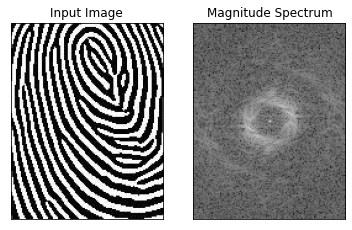

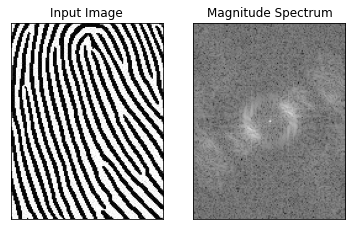

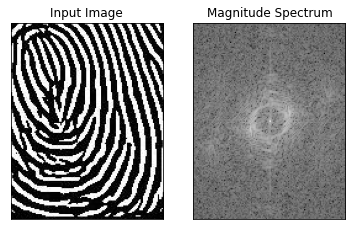

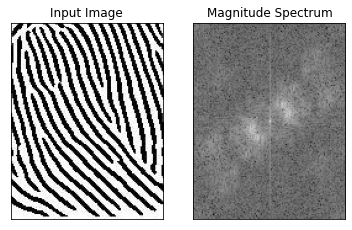

In [ ]:
# Cropped btw real p1_t1 and fake p1_t2

# real p1_t1
img1 = cv2.imread('14_2_r.jpg',0) 
freq_shift1, mag_spec1 = log_fourier(img1)

# fake p1_t2
img2 = cv2.imread('14_2_f.jpg',0) 
freq_shift2, mag_spec2 = log_fourier(img2)

# real p2_t1
img3 = cv2.imread('7_1_r.jpg',0) 
freq_shift3, mag_spec3 = log_fourier(img3)

# fake p2_t2
img4 = cv2.imread('7_1_f.jpg',0) 
freq_shift4, mag_spec4 = log_fourier(img4)

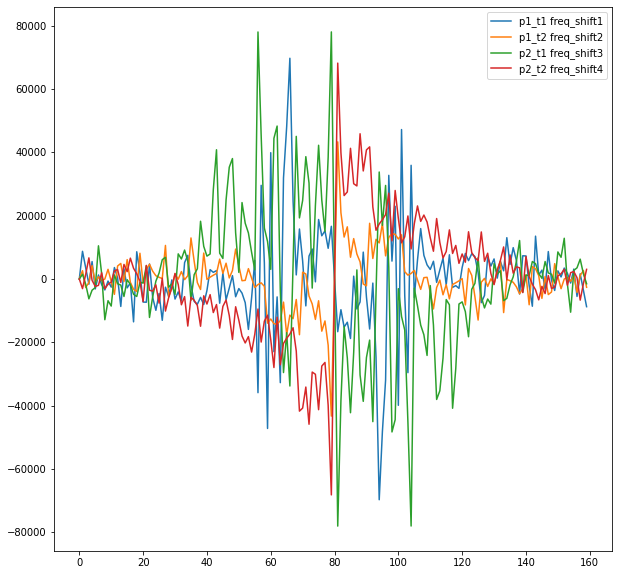

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(freq_shift1[:, 62, 0], label='p1_t1 freq_shift1')
plt.plot(freq_shift2[:, 62, 0], label='p1_t2 freq_shift2')
plt.plot(freq_shift3[:, 62, 0], label='p2_t1 freq_shift3')
plt.plot(freq_shift4[:, 62, 0], label='p2_t2 freq_shift4')
plt.legend()
plt.show()

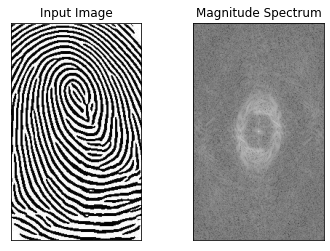

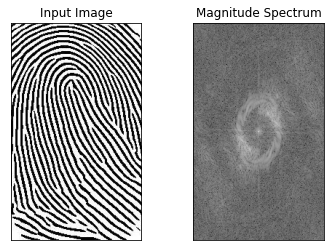

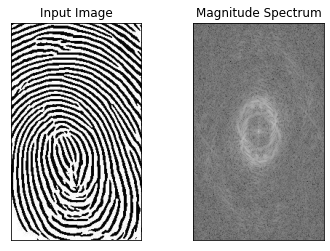

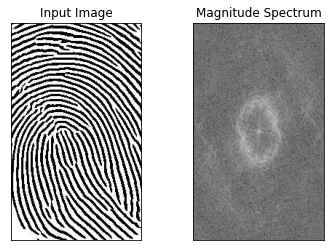

In [ ]:
# Full btw real p1_t1 and fake p1_t2 

# real p1_t1
img1 = cv2.imread('14_2_r.jpg',0) 
freq_shift1, mag_spec1 = log_fourier(img1)

# fake p1_t2
img2 = cv2.imread('14_2_f.jpg',0) 
freq_shift2, mag_spec2 = log_fourier(img2)

# real p2_t1
img3 = cv2.imread('7_1_r.jpg',0) 
freq_shift3, mag_spec3 = log_fourier(img3)

# fake p2_t2
img4 = cv2.imread('7_1_f.jpg',0) 
freq_shift4, mag_spec4 = log_fourier(img4)

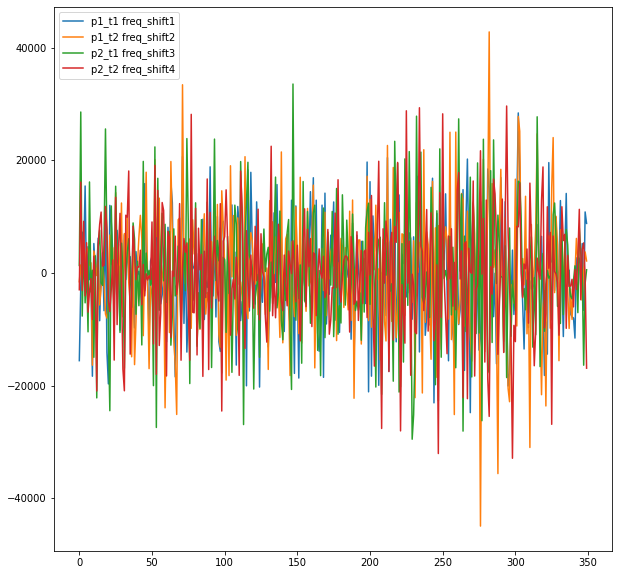

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(freq_shift1[:, 62, 0], label='p1_t1 freq_shift1')
plt.plot(freq_shift2[:, 62, 0], label='p1_t2 freq_shift2')
plt.plot(freq_shift3[:, 62, 0], label='p2_t1 freq_shift3')
plt.plot(freq_shift4[:, 62, 0], label='p2_t2 freq_shift4')
plt.legend()
plt.show()

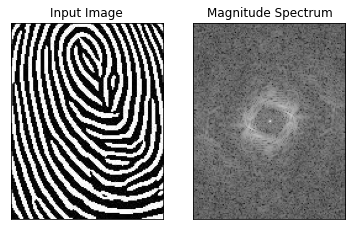

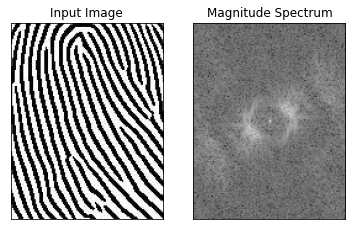

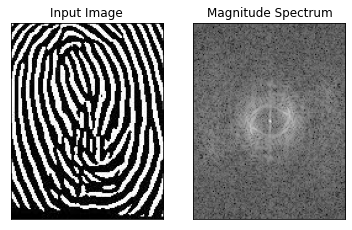

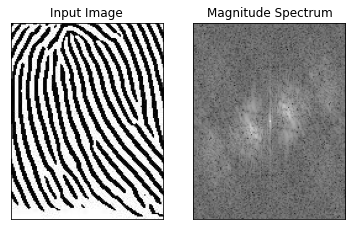

In [ ]:
# Cropped btw real p1_t1 and fake p2_t1

# real p1_t1
img1 = cv2.imread('14_6_r.jpg',0) 
freq_shift1, mag_spec1 = log_fourier(img1)

# fake p2_t1
img2 = cv2.imread('14_6_f.jpg',0) 
freq_shift2, mag_spec2 = log_fourier(img2)

# real p1_t2
img3 = cv2.imread('7_5_r.jpg',0) 
freq_shift3, mag_spec3 = log_fourier(img3)

# fake p2_t2
img4 = cv2.imread('7_5_f.jpg',0) 
freq_shift4, mag_spec4 = log_fourier(img4)

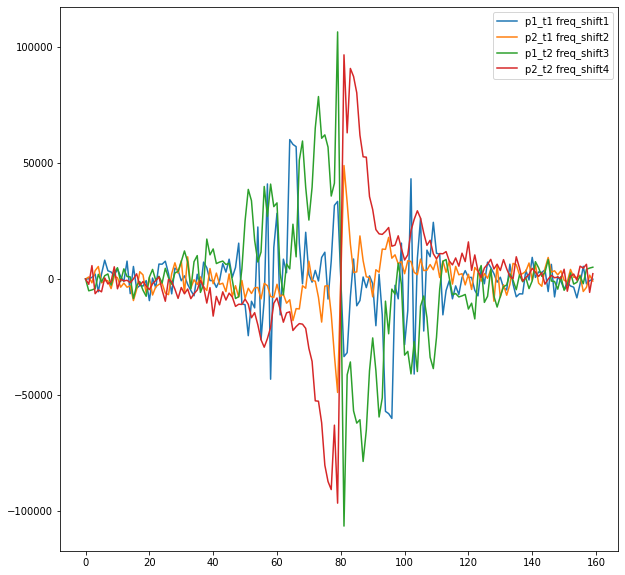

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(freq_shift1[:, 62, 0], label='p1_t1 freq_shift1')
plt.plot(freq_shift2[:, 62, 0], label='p2_t1 freq_shift2')
plt.plot(freq_shift3[:, 62, 0], label='p1_t2 freq_shift3')
plt.plot(freq_shift4[:, 62, 0], label='p2_t2 freq_shift4')
plt.legend()
plt.show()

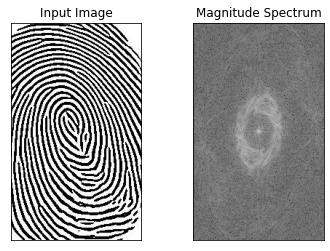

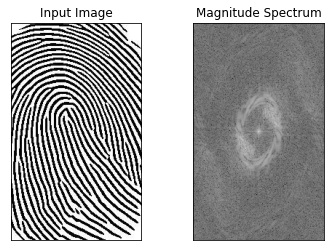

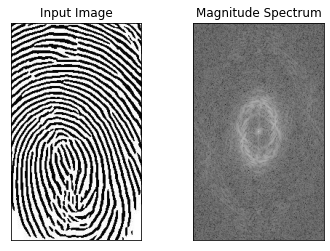

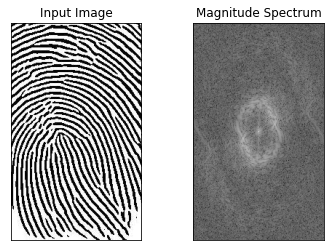

In [ ]:
# Full btw real p1_t1 and fake p2_t1

# real p1_t1
img1 = cv2.imread('14_6_r.jpg',0) 
freq_shift1, mag_spec1 = log_fourier(img1)

# fake p2_t1
img2 = cv2.imread('14_6_f.jpg',0) 
freq_shift2, mag_spec2 = log_fourier(img2)

# real p1_t2
img3 = cv2.imread('7_5_r.jpg',0) 
freq_shift3, mag_spec3 = log_fourier(img3)

# fake p2_t2
img4 = cv2.imread('7_5_f.jpg',0) 
freq_shift4, mag_spec4 = log_fourier(img4)

In [ ]:
plt.plot(freq_shift3[:, 62, 0])
plt.show()

In [ ]:
np.shape(freq_shift1)

(160, 124, 2)

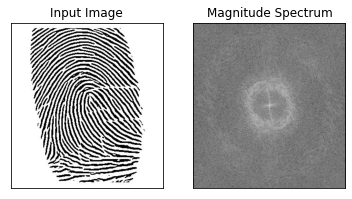

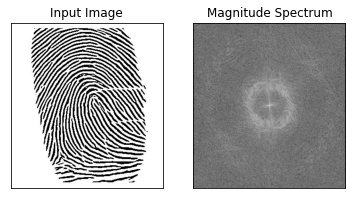

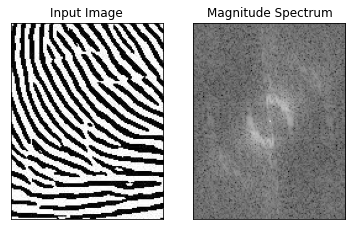

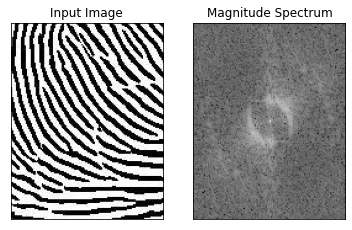

In [ ]:
img1 = cv2.imread('101_5_bin.jpg',0)
lena_shift,i = log_fourier(img1)

img1 = cv2.imread('101_6_bin.jpg',0)
lena_shift,i = log_fourier(img1)

img1 = cv2.imread('101__5_bin.jpg',0)
lena_shift,i = log_fourier(img1)

img1 = cv2.imread('101__6_bin.jpg',0)
lena_shift,i = log_fourier(img1)

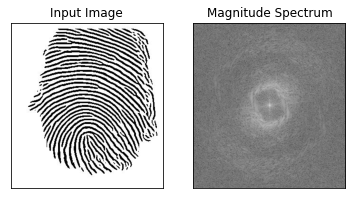

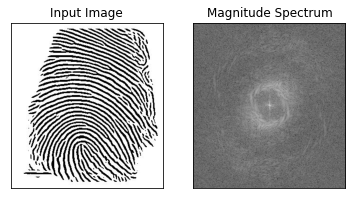

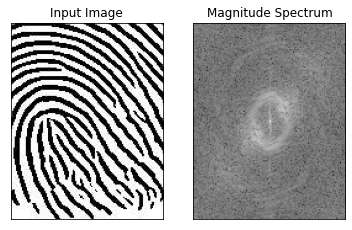

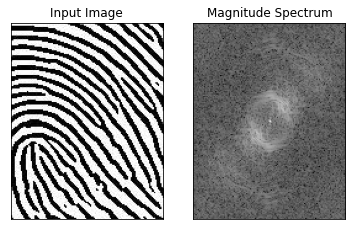

In [ ]:
img1 = cv2.imread('5_1_bin.jpg',0)
lena_shift,i = log_fourier(img1)

img1 = cv2.imread('5_2_bin.jpg',0)
lena_shift,i = log_fourier(img1)

img1 = cv2.imread('5__1_bin.jpg',0)
lena_shift,i = log_fourier(img1)

img1 = cv2.imread('5__2_bin.jpg',0)
lena_shift,i = log_fourier(img1)

In [ ]:
img1 = cv2.imread('14_3_f.jpg',0)
lena_shift,i = log_fourier(img1)

img1 = cv2.imread('14_4_f.jpg',0)
lena_shift,i = log_fourier(img1)

img1 = cv2.imread('14_3_f_bin.jpg',0)
lena_shift,i = log_fourier(img1)

img1 = cv2.imread('14_4_f_bin.jpg',0)
lena_shift,i = log_fourier(img1)

In [ ]:
dft_shift2[0:70][0:52][0]

In [ ]:
np.shape(dft_shift1)

(160, 124, 2)

In [ ]:
dft_shift2[0:70][0:52][0:2] = 164 

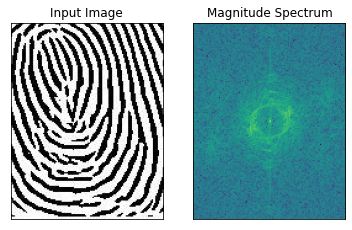

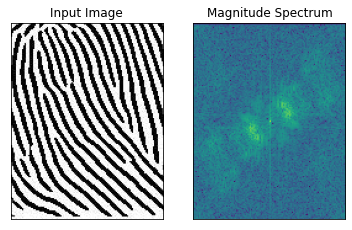

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#img = cv2.imread('13_4.jpg',0)

#dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
#dft_shift = np.fft.fftshift(dft)
dft_shift1 = fshift_i
dft_shift2 = fshift_j

magnitude_spectrum1 = 20*np.log(cv2.magnitude(dft_shift1[:,:,0],dft_shift1[:,:,1]))
magnitude_spectrum2 = 20*np.log(cv2.magnitude(dft_shift2[:,:,0],dft_shift2[:,:,1]))

#magnitude_spectrum = i-j

plt.subplot(121),plt.imshow(img1, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum1)#, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(121),plt.imshow(img2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum2)#, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

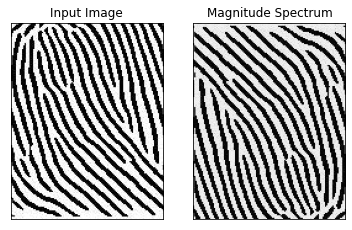

In [ ]:
img_back = cv2.idft(dft_shift2)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

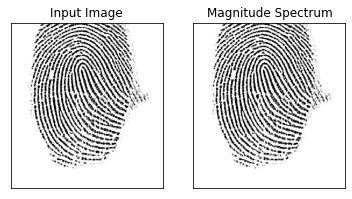

In [ ]:
#img = cv2.imread('13_4.jpg',0)
#lena_shift,i = log_fourier(img)

#rows, cols = img.shape
#crow,ccol = rows/2 , cols/2

# create a mask first, center square is 1, remaining all zeros
#mask = np.zeros((rows,cols,2),np.uint8)
#mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift #*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()